In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re, nltk, string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [29]:
'''
Pada tugas akhir ini saya ingin mencari topik tentang demo mahasiswa dikarenakan dalam beberapa hari terakhir ini ramai berita di twitter tentang adanya demo mahasiswa. 
Jadi saya ingin mengetahui alasan demo mahasiswa tersebut bisa terjadi.
'''

'\nPada tugas akhir ini saya ingin mencari topik tentang demo mahasiswa dikarenakan dalam beberapa hari terakhir ini ramai berita di twitter tentang adanya demo mahasiswa. \nJadi saya ingin mengetahui alasan demo mahasiswa tersebut bisa terjadi.\n'

In [30]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

query = '"demo mahasiswa" -filter:retweets lang:id'
max_result = 300

response = tweepy.Cursor(api.search_tweets,
                        q = query,
                        lang = 'id',
                        tweet_mode = 'extended',
                        ).items(max_result)

result = [tweet.full_text.strip() for tweet in response]
df_demo = pd.DataFrame(result, columns=['tweet'])
df_demo.to_csv('tweets_demoMahasiswa.csv',index=False)


In [2]:
df_demo = pd.read_csv("tweets_demoMahasiswa.csv")
df_demo

,tweet
0,@kangdede78 Oooh demo mahasiswa ditunggangi ba...
1,Koordinator Media BEM SI Luthfi Yufrizal menga...
2,@IstanaLurah Yg dulu bilang kangen di demo mah...
3,"Kata Aktivis, Demo Mahasiswa Sekarang Mirip Ge..."
4,Gak harus takut dengan demo mahasiswa karena m...
...,...
295,"Ada mantan mahasiswa, mantan aktivis, sekarang..."
296,@HeriSuwondo2 semoga ga kendor semangat demo m...
297,Mereka tak pernah henti untuk mencoba menurunk...
298,"@tvOneNews Yang kek gini kalian siarkan, demo ..."


In [3]:
#Text Pre-Processing

def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9_@#%&\*]+)|([^A-Za-z \t])|(\w+:\/\/\S+)", " ", data).split())
    data = re.sub(r"\d+","",data)
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    result = re.sub(r"\t","",data)
    return result

def stopwords_cleaner(data):
    sw_indonesia = stopwords.words('indonesian')
    list_negasi = ['tidak','lawan','anti','belum','belom','tdk','jangan','enggak','bukan','tak']
    sw_indonesia = [word for word in sw_indonesia if word not in list_negasi]
    data = [word for word in data if word not in sw_indonesia]
    result = ' '.join(data)
    return result

def slang_cleaner(data, slang_list = []):
    word_token = word_tokenize(data)
    word_list = []

    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang [0].lower():
                word = slang[1]
                break
        word_list.append(word)

    result = ' '.join(word_list)
    return result

In [4]:
df_demo['clean_tweet'] = df_demo['tweet'].apply(lambda x: case_folding(x))
df_demo['clean_tweet'] = df_demo['clean_tweet'].apply(lambda x: word_tokenize(x))
df_demo['clean_tweet'] = df_demo['clean_tweet'].apply(lambda x: stopwords_cleaner(x))


In [5]:
df_demo

,tweet,clean_tweet
0,@kangdede78 Oooh demo mahasiswa ditunggangi ba...,oooh demo mahasiswa ditunggangi bandit ya data...
1,Koordinator Media BEM SI Luthfi Yufrizal menga...,koordinator media bem si luthfi yufrizal mengi...
2,@IstanaLurah Yg dulu bilang kangen di demo mah...,yg bilang kangen demo mahasiswa tolong bersika...
3,"Kata Aktivis, Demo Mahasiswa Sekarang Mirip Ge...",aktivis demo mahasiswa gerakan berangkat pende...
4,Gak harus takut dengan demo mahasiswa karena m...,gak takut demo mahasiswa dijamin uu beraspiras...
...,...,...
295,"Ada mantan mahasiswa, mantan aktivis, sekarang...",mantan mahasiswa mantan aktivis sibuk mengolok...
296,@HeriSuwondo2 semoga ga kendor semangat demo m...,semoga ga kendor semangat demo mahasiswa
297,Mereka tak pernah henti untuk mencoba menurunk...,tak henti mencoba menurunkan presiden terpilih...
298,"@tvOneNews Yang kek gini kalian siarkan, demo ...",kek gini siarkan demo mahasiswa sedikitpun gak...


In [6]:
def word_freq_distribution(data):
    data = data.apply(lambda x: word_tokenize(str(x)))
    tweets = [word for tweet in data for word in tweet]
    fqdist = FreqDist(tweets)
    most_common_word = fqdist.most_common(100)
    return most_common_word, tweets

In [7]:
most_common_word = word_freq_distribution(df_demo['clean_tweet'])
print(most_common_word[0])

[('demo', 366), ('mahasiswa', 357), ('yg', 98), ('rakyat', 56), ('april', 50), ('ga', 43), ('tidak', 42), ('nya', 33), ('aksi', 29), ('buzzerp', 28), ('cebonger', 27), ('presiden', 27), ('jokowi', 27), ('tv', 26), ('ya', 24), ('jangan', 24), ('gak', 23), ('indonesia', 23), ('periode', 19), ('media', 19), ('mahasiswabergerak', 19), ('besok', 18), ('bukan', 17), ('kalo', 16), ('berita', 16), ('aja', 16), ('tolak', 16), ('tni', 16), ('wiranto', 16), ('bem', 15), ('amp', 15), ('tak', 15), ('aparat', 15), ('negara', 13), ('lihat', 12), ('harga', 12), ('masyarakat', 12), ('pemerintah', 12), ('gerakan', 11), ('bubarkan', 11), ('pemilu', 11), ('online', 11), ('isu', 11), ('berangkat', 10), ('penderitaan', 10), ('dgn', 10), ('hahahahaha', 10), ('ancam', 10), ('orasi', 10), ('jabatan', 10), ('rezim', 10), ('tdk', 10), ('warga', 10), ('memberitakan', 10), ('si', 9), ('polda', 9), ('hadapi', 9), ('tandingi', 9), ('nandingi', 9), ('fiks', 9), ('pesan', 9), ('lomba', 9), ('hasil', 9), ('udah', 9), (

In [8]:
slang_list = [
                ('yg','yang'),
                ('gak','tidak'),
                ('ga','tidak'),
                ('ya','iya'),
                ('aja','saja'),
                ('kalo','kalau'),
                ('nya',''),
                ('amp',''),
                ('tak','tidak'),
                ('dgn','dengan'),
                ('tdk','tidak'),
                ('tgl','tanggal'),
                ('gw','saya'),
                ('si',''),
                ('gk','tidak'),
                ('dr','dari'),
                ('udah','sudah'),
                ('nih',''),
                ('utk','untuk'),
                ('jg','juga'),
                ('lu','kamu'),
                ('kek','seperti')
]

In [9]:
df_demo['clean_tweet'] = df_demo['clean_tweet'].apply(lambda x: slang_cleaner(x, slang_list))
df_demo['clean_tweet'] = df_demo['clean_tweet'].apply(lambda x: word_tokenize(x))
df_demo['clean_tweet'] = df_demo['clean_tweet'].apply(lambda x: stopwords_cleaner(x))



In [10]:
df_demo

,tweet,clean_tweet
0,@kangdede78 Oooh demo mahasiswa ditunggangi ba...,oooh demo mahasiswa ditunggangi bandit iya dat...
1,Koordinator Media BEM SI Luthfi Yufrizal menga...,koordinator media bem luthfi yufrizal mengirim...
2,@IstanaLurah Yg dulu bilang kangen di demo mah...,bilang kangen demo mahasiswa tolong bersikap s...
3,"Kata Aktivis, Demo Mahasiswa Sekarang Mirip Ge...",aktivis demo mahasiswa gerakan berangkat pende...
4,Gak harus takut dengan demo mahasiswa karena m...,tidak takut demo mahasiswa dijamin uu beraspir...
...,...,...
295,"Ada mantan mahasiswa, mantan aktivis, sekarang...",mantan mahasiswa mantan aktivis sibuk mengolok...
296,@HeriSuwondo2 semoga ga kendor semangat demo m...,semoga tidak kendor semangat demo mahasiswa
297,Mereka tak pernah henti untuk mencoba menurunk...,tidak henti mencoba menurunkan presiden terpil...
298,"@tvOneNews Yang kek gini kalian siarkan, demo ...",gini siarkan demo mahasiswa sedikitpun tidak m...


(demo, mahasiswa)           297
(mahasiswa, demo)            24
(mahasiswa, tidak)           23
(mahasiswa, april)           23
(cebonger, buzzerp)          18
(aksi, demo)                 17
(ancam, bubarkan)            10
(gerakan, berangkat)         10
(bubarkan, demo)             10
(berangkat, penderitaan)     10
(penderitaan, rakyat)        10
(tidak, nandingi)             9
(lihat, buzzerp)              9
(tandingi, demo)              9
(besok, tidak)                9
(mahasiswa, rakyat)           9
(buzzerp, cebonger)           9
(mahasiswa, lihat)            9
(indonesia, april)            9
(demo, indonesia)             9
dtype: int64


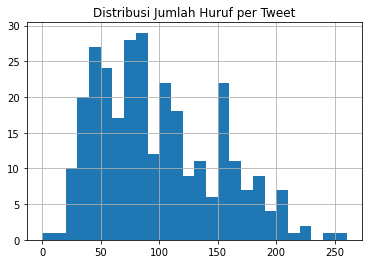

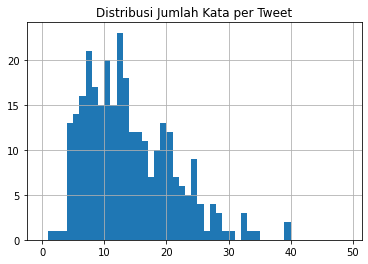

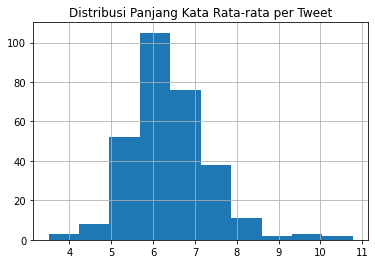

In [167]:
def char_freq_distribution(data):
    bins = np.arange(0,270,10)
    plot_1 = plt.figure(1)
    data.str.len().hist(bins=bins)
    plt.title('Distribusi Jumlah Huruf per Tweet')

def word_len_freq_distribution(data):
    bin_range = np.arange(0,50)
    plot_2 = plt.figure(2)
    data.str.split().map(lambda x: len(x)).hist(bins=bin_range)
    plt.title('Distribusi Jumlah Kata per Tweet')

def mean_words_freq_distribution(data):
    plot_3 = plt.figure(3)
    data.str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    plt.title('Distribusi Panjang Kata Rata-rata per Tweet')

def bigram_freq_distribution(data):
    data_to_list = [word for news in data for word in news.split()]
    result = pd.Series(nltk.ngrams(data_to_list, 2)).value_counts()[:20]
    return result

def wordcloud_visualization(data):
    wcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(data)
    plt.figure(figsize=(12,10))
    plt.imshow(wcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

char_freq_distribution(df_demo['clean_tweet'])
word_len_freq_distribution(df_demo['clean_tweet'])
mean_words_freq_distribution(df_demo['clean_tweet'])
bigram_result = bigram_freq_distribution(df_demo['clean_tweet'])
print(bigram_result)

plt.show()

In [11]:
pos_list = open('kata_positif.txt','r')
pos_kata = pos_list.readlines()
neg_list = open('kata_negatif.txt','r')
neg_kata = neg_list.readlines()

In [12]:
tweets = [tweet for tweet in df_demo['clean_tweet']]

In [172]:
hasil = []
list_negasi = ['tidak','lawan','anti','belum','belom','tdk','jangan','enggak','bukan','tak']

for tweet in tweets:
    tweet_clean = tweet.strip().split()

    count_p = 0
    count_n = 0

    for word in tweet_clean:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == word.lower():
                if tweets[tweets.index(tweet)-1] in list_negasi:
                    print(tweets[tweets.index(tweet)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == word.lower():
                if tweets[tweets.index(tweet)-1] in list_negasi:
                    print(tweets[tweets.index(tweet)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1

    print('positif: '+str(count_p))
    print('negatif: '+str(count_n))
    hasil.append(count_p - count_n)
    print('-----------------------------------------')

demo
 ['negatif']
ditunggangi
 ['negatif']
ditunggangi
 ['negatif']
aman
 ['positif']
positif: 1
negatif: 3
-----------------------------------------
demo
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------
demo
 ['negatif']
sportif
 ['positif']
berani
 ['positif']
demo
 ['negatif']
minggat
 ['negatif']
minggat
 ['negatif']
pembohong
 ['negatif']
positif: 2
negatif: 5
-----------------------------------------
demo
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------
takut
 ['negatif']
demo
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------
dalih
 ['negatif']
demo
 ['negatif']
rusuh
 ['negatif']
positif: 0
negatif: 3
-----------------------------------------
demo
 ['negatif']
demo
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------
demo
 ['negatif']
demo
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------
demo
 ['negatif']
positif: 0
negatif: 1
-------------------

In [173]:
sentiments = ['positif' if sentimen >= 0 else 'negatif' for sentimen in hasil]
df_demo['sentiment'] = sentiments

In [174]:
df_demo

,tweet,clean_tweet,sentiment
0,@kangdede78 Oooh demo mahasiswa ditunggangi ba...,oooh demo mahasiswa ditunggangi bandit iya dat...,negatif
1,Koordinator Media BEM SI Luthfi Yufrizal menga...,koordinator media bem luthfi yufrizal mengirim...,negatif
2,@IstanaLurah Yg dulu bilang kangen di demo mah...,bilang kangen demo mahasiswa tolong bersikap s...,negatif
3,"Kata Aktivis, Demo Mahasiswa Sekarang Mirip Ge...",aktivis demo mahasiswa gerakan berangkat pende...,negatif
4,Gak harus takut dengan demo mahasiswa karena m...,tidak takut demo mahasiswa dijamin uu beraspir...,negatif
...,...,...,...
295,"Ada mantan mahasiswa, mantan aktivis, sekarang...",mantan mahasiswa mantan aktivis sibuk mengolok...,positif
296,@HeriSuwondo2 semoga ga kendor semangat demo m...,semoga tidak kendor semangat demo mahasiswa,positif
297,Mereka tak pernah henti untuk mencoba menurunk...,tidak henti mencoba menurunkan presiden terpil...,positif
298,"@tvOneNews Yang kek gini kalian siarkan, demo ...",gini siarkan demo mahasiswa sedikitpun tidak m...,negatif


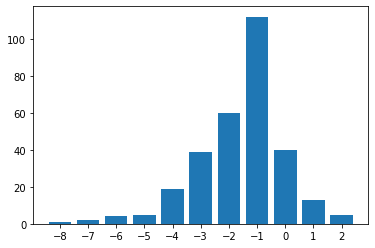

In [175]:
labels, counts = np.unique(hasil, return_counts=True)
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.show()